# Fitting real data to Arps and Wor Models

Most of the time you have to get the declination parameters by fitting the real data. Both Arps and Wor classes have the method `fit` to excecute the workflow. 


## Fit to Arps 

Import a sample production from a csv file and plot it.

In [1]:
import pandas as pd
import numpy as np
from dcapy import dca
from dcapy.filters import exp_wgh_avg
import matplotlib.pyplot as plt
from datetime import date, datetime
np.seterr(divide='ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [2]:
prod = pd.read_csv('prod.csv')
prod['date'] = pd.to_datetime(prod['date'], format='%Y-%m-%d')
print(prod.head())
print(prod.tail())
print(prod.shape)


        date    prod
0 2015-07-01  338.58
1 2015-07-02  339.75
2 2015-07-03  349.65
3 2015-07-04  357.48
4 2015-07-05  344.16
          date   prod
602 2017-02-27  97.47
603 2017-02-28  97.56
604 2017-03-01  97.65
605 2017-03-02  97.74
606 2017-03-03  97.92
(607, 2)


It is highly recommended to convert the date data to a datetime pandas format before pass it to the `fit` method

<AxesSubplot:xlabel='date', ylabel='prod'>

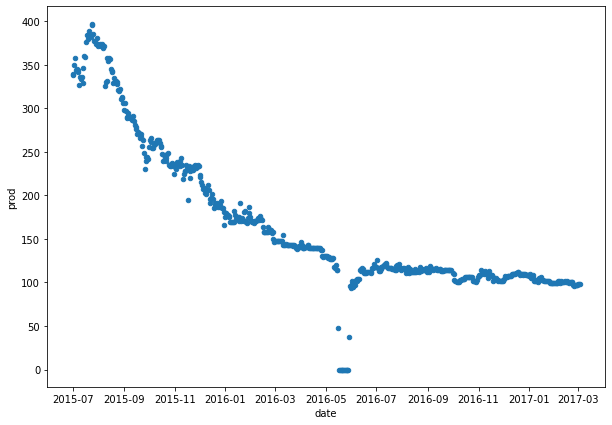

In [3]:
fig, ax = plt.subplots(figsize=(10,7))
prod.plot(x='date',y='prod', kind='scatter',ax=ax)

You can create an empty `Arps` instance and just define the frequency of the decline rate. As the input data format is a datetime, the `freq_di` is set on 'D'

By calling `fit` method with the dataframe containing the production information you have to indicate the columns name containing the time and rate.

In [4]:
d1 = dca.Arps(freq_di='D')
d1.fit(df=prod,time='date',rate='prod')
d1

/home/scuervo/Documents/dev/apps/dcapy/dcapy/filters/filters.py:63: RuntimeWarning: invalid value encountered in true_divide
  y = np.nan_to_num(yw / bias_correction)


Declination 
 Ti: 2015-07-02 
 Qi: 405.9511186841064 bbl/d 
 Di: 0.00618008412058399 D 
 b: 0.9999999999737121

The method tries to fit the data to Arps equation by tunning in this case the parameters `di` and `b`.

Once the data is fitted the instances is populated with those parameters and you can start to make forecast

/home/scuervo/Documents/dev/apps/dcapy/dcapy/dca/arps.py:82: RuntimeWarning: invalid value encountered in multiply
  return f*(g-h)


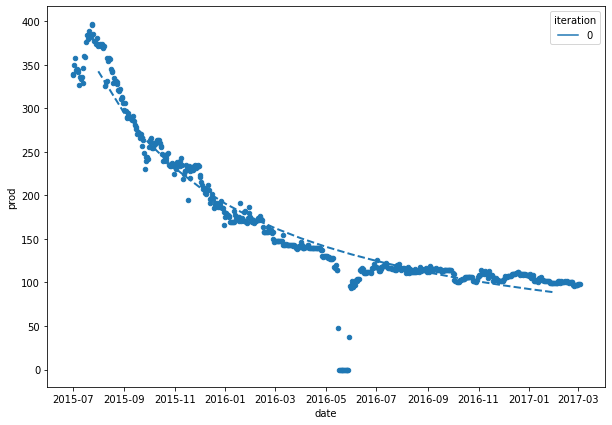

In [5]:
fig, ax = plt.subplots(figsize=(10,7))

prod.plot(x='date',y='prod', kind='scatter',ax=ax)

d1.plot(ax=ax, start=date(2015,7,1), end=date(2017,2,28))

### Fit data with a fix `b` value

If you'd like to fit the data specifically with a certain value of `b` parameter, you can declare it in the `fit`  method

/home/scuervo/Documents/dev/apps/dcapy/dcapy/filters/filters.py:63: RuntimeWarning: invalid value encountered in true_divide
  y = np.nan_to_num(yw / bias_correction)
/home/scuervo/Documents/dev/apps/dcapy/dcapy/dca/arps.py:82: RuntimeWarning: invalid value encountered in multiply
  return f*(g-h)
Declination 
 Ti: 2015-07-02 
 Qi: 405.9511411187894 bbl/d 
 Di: 0.006180084996307258 D 
 b: 1.0


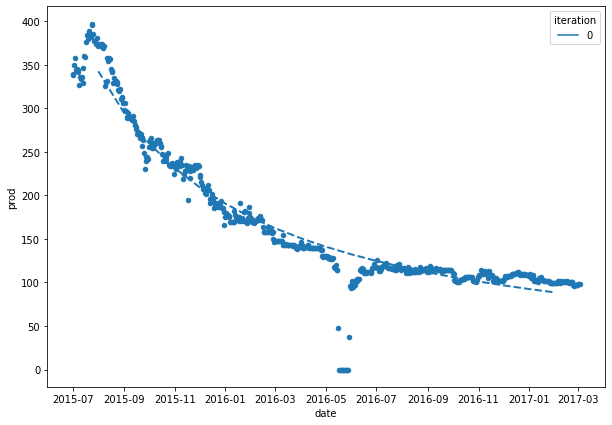

In [6]:
d2 = dca.Arps(freq_di='D')
filters = d2.fit(df=prod,time='date',rate='prod', b=1)
print(d2)

fig, ax = plt.subplots(figsize=(10,7))

prod.plot(x='date',y='prod', kind='scatter',ax=ax)

d2.plot(ax=ax, start=date(2015,7,1), end=date(2017,2,28))


## Data Filtering

When passing data to the `fit` method it automatically filter production greater than zero to used by the fitting function. 



/home/scuervo/Documents/dev/apps/dcapy/dcapy/dca/arps.py:82: RuntimeWarning: invalid value encountered in multiply
  return f*(g-h)


<AxesSubplot:xlabel='time', ylabel='oil_rate'>

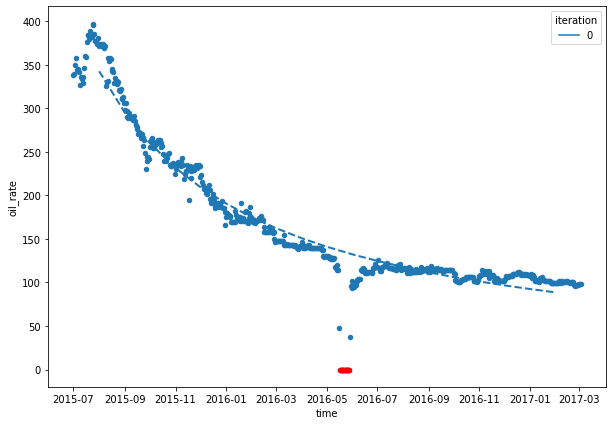

In [7]:
fig, ax = plt.subplots(figsize=(10,7))
prod.plot(x='date',y='prod', kind='scatter',ax=ax)

d2.plot(ax=ax, start=date(2015,7,1), end=date(2017,2,28))
filters.loc[filters['filter']==1].plot(x='time',y='oil_rate', kind='scatter',ax=ax, color='r')

If you want to apply another filter to remove possible outliers or anomaly data, you can use the `zscore` filter in the `dcapy.filters` module

In [8]:
from dcapy.filters import zscore

In [9]:
d3 = dca.Arps(freq_di='D')
f = d3.fit(df=prod,time='date',rate='prod', filter=zscore)
d3

/home/scuervo/Documents/dev/apps/dcapy/dcapy/filters/filters.py:63: RuntimeWarning: invalid value encountered in true_divide
  y = np.nan_to_num(yw / bias_correction)


Declination 
 Ti: 2015-07-02 
 Qi: 405.6180677993501 bbl/d 
 Di: 0.0061525623163733705 D 
 b: 0.9999999999999508

/home/scuervo/Documents/dev/apps/dcapy/dcapy/dca/arps.py:82: RuntimeWarning: invalid value encountered in multiply
  return f*(g-h)


<AxesSubplot:xlabel='time', ylabel='oil_rate'>

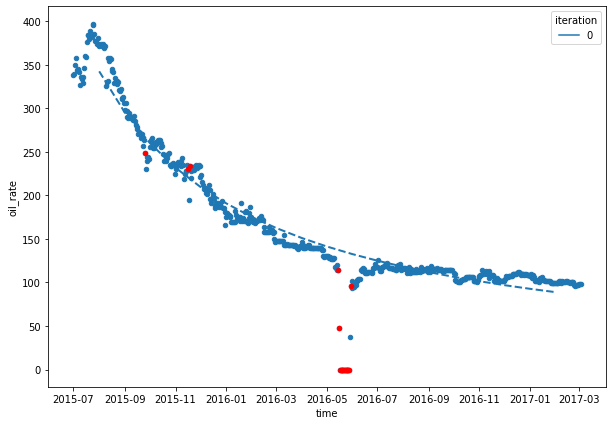

In [10]:
fig, ax = plt.subplots(figsize=(10,7))
prod.plot(x='date',y='prod', kind='scatter',ax=ax)

d3.plot(ax=ax, start=date(2015,7,1), end=date(2017,2,28))
f.loc[f['filter']==1].plot(x='time',y='oil_rate', kind='scatter',ax=ax, color='r')

In [11]:
d3 = dca.Arps(freq_di='D')
f = d3.fit(df=prod,time=prod.index.values,rate='prod', filter=zscore)
d3

/home/scuervo/Documents/dev/apps/dcapy/dcapy/filters/filters.py:63: RuntimeWarning: invalid value encountered in true_divide
  y = np.nan_to_num(yw / bias_correction)


Declination 
 Ti: 1 
 Qi: 405.6331402648868 bbl/d 
 Di: 0.006143434026879475 D 
 b: 0.9948666436238093

## fit to WOR